# Task 1: Exploratory Data Analysis (EDA) and Statistics

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

### Loading the Dataset

In [3]:
# In this task, we will prepare and clean the dataset for further analysis.
# First, we will load the module for data loading 
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 3\\challenge\\insurisk-analytics-and-predictive-modeling\\src\\data_loader.py'>

In [4]:
raw_data_dir = '../data'
loader = DataLoader(raw_data_dir)
# Load the dataset
df = loader.load_data('MachineLearningRating_v3.txt')
# Display the first few rows of the dataset
df.head()

D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\data_loader.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path, sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### EDA 

#### Data Overview

In [5]:
#import the module for eda Processing
from src.analysis.eda import EDA
import src.analysis.eda
reload(src.analysis.eda)

<module 'src.analysis.eda' from 'D:\\Research & Project\\10academy\\week 3\\challenge\\insurisk-analytics-and-predictive-modeling\\src\\analysis\\eda.py'>

In [6]:
# data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [7]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Number of rows: 1000098
Number of columns: 52


In [8]:
# instantiate the EDA class
eda = EDA(df)

In [9]:
# Display the data types of each column
eda.data_types()

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [10]:
# print unique values in each column
print("Unique Values in each column \n",eda.unique_values())

Unique Values in each column 
 {'UnderwrittenCoverID': 116532, 'PolicyID': 7000, 'TransactionMonth': 23, 'IsVATRegistered': 2, 'Citizenship': 4, 'LegalType': 6, 'Title': 5, 'Language': 1, 'Bank': 11, 'AccountType': 3, 'MaritalStatus': 3, 'Gender': 3, 'Country': 1, 'Province': 9, 'PostalCode': 888, 'MainCrestaZone': 16, 'SubCrestaZone': 45, 'ItemType': 1, 'mmcode': 427, 'VehicleType': 5, 'RegistrationYear': 25, 'make': 46, 'Model': 411, 'Cylinders': 7, 'cubiccapacity': 122, 'kilowatts': 82, 'bodytype': 13, 'NumberOfDoors': 6, 'VehicleIntroDate': 174, 'CustomValueEstimate': 923, 'AlarmImmobiliser': 2, 'TrackingDevice': 2, 'CapitalOutstanding': 1011, 'NewVehicle': 2, 'WrittenOff': 2, 'Rebuilt': 2, 'Converted': 2, 'CrossBorder': 1, 'NumberOfVehiclesInFleet': 0, 'SumInsured': 2186, 'TermFrequency': 2, 'CalculatedPremiumPerTerm': 19869, 'ExcessSelected': 13, 'CoverCategory': 28, 'CoverType': 22, 'CoverGroup': 14, 'Section': 5, 'Product': 4, 'StatutoryClass': 1, 'StatutoryRiskType': 1, 'Total

In [11]:
# diplay %age  of missing values in each column
print("Number of missing values in each column")
print("----------------------------------------")
print(eda.missing_values())

Number of missing values in each column
----------------------------------------
Bank                        14.594670
AccountType                  4.022806
MaritalStatus                0.825819
Gender                       0.953507
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
Model                        0.055195
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
bodytype                     0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
CustomValueEstimate         77.956560
CapitalOutstanding           0.000200
NewVehicle                  15.327998
WrittenOff                  64.183810
Rebuilt                     64.183810
Converted                   64.183810
CrossBorder                 99.930207
NumberOfVehiclesInFleet    100.000000
dtype: float64


In [12]:
# print the columns with outliers
print("Columns with outliers:")
print("----------------------------------------")
outlier= eda.outlier_analysis()
for col, outliers in outlier.items():
    print(f"{col}:---------- {outliers} outliers")

Columns with outliers:
----------------------------------------
UnderwrittenCoverID:---------- 1961 outliers
PolicyID:---------- 0 outliers
PostalCode:---------- 0 outliers
mmcode:---------- 54514 outliers
RegistrationYear:---------- 7482 outliers
Cylinders:---------- 34262 outliers
cubiccapacity:---------- 5669 outliers
kilowatts:---------- 2725 outliers
NumberOfDoors:---------- 29647 outliers
CustomValueEstimate:---------- 129 outliers
NumberOfVehiclesInFleet:---------- 0 outliers
SumInsured:---------- 51 outliers
CalculatedPremiumPerTerm:---------- 743 outliers
TotalPremium:---------- 12470 outliers
TotalClaims:---------- 1312 outliers


In [13]:
# overall statistics of the dataset before preprocessing
print("Overall statistics of the dataset before preprocessing")
print("------------------------------------------------")
eda.descriptive_statistics()

Overall statistics of the dataset before preprocessing
------------------------------------------------


,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


In [14]:
# Loading modules  to perform preprocessing
from src.analysis.preprocessing import Preprocessing
import src.analysis.preprocessing
reload(src.analysis.preprocessing)
preprocessing = Preprocessing(df)

#### preprocessing

In [15]:
# drop the columns with more than 5% missing values
clean_df = preprocessing.preprocess()

Dropping columns with > 5.0% missing values:
['Bank', 'CustomValueEstimate', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']



D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\preprocessing.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].mean(), inplace=True)
D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\preprocessing.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This

In [16]:
clean_df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
18,120087,10173,2014-11-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.119561,0.0
19,120087,10173,2015-01-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.597807,0.0
20,120087,10173,2015-04-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.597807,0.0
21,120087,10173,2015-06-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.597807,0.0
22,120087,10173,2015-08-01,True,,Close Corporation,Mr,English,Current account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.597807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000077,31512,389,2014-10-01,False,ZW,Individual,Mr,English,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.933684,0.0
1000078,31512,389,2014-12-01,False,ZW,Individual,Mr,English,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.933684,0.0
1000079,31512,389,2015-03-01,False,ZW,Individual,Mr,English,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.933684,0.0
1000080,31512,389,2015-05-01,False,ZW,Individual,Mr,English,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.933684,0.0


In [17]:
# shape of the cleaned dataset
print("Shape of the cleaned dataset:", clean_df.shape)

Shape of the cleaned dataset: (817156, 44)


In [18]:
# Calculate variability for key financial features specifically
key_financial_features = ['TotalPremium', 'TotalClaims', 'CapitalOutstanding']
print(clean_df[key_financial_features].describe().transpose())

                 count       mean        std         min  25%       50%  \
TotalPremium  817156.0  31.953482  73.073437 -135.755416  0.0  2.109912   
TotalClaims   817156.0   0.977415  36.901439 -635.480000  0.0  0.000000   

                    75%          max  
TotalPremium  21.929825   431.486404  
TotalClaims    0.000000  2700.000000  


### Univariate Analysis

In [52]:
#load libraries for visualization
from src.analysis.visualization import Visualization
import src.analysis.visualization
reload(src.analysis.visualization)

<module 'src.analysis.visualization' from 'D:\\Research & Project\\10academy\\week 3\\challenge\\insurisk-analytics-and-predictive-modeling\\src\\analysis\\visualization.py'>

In [53]:
# Create an instance of the Visualization class
visualization = Visualization(clean_df)

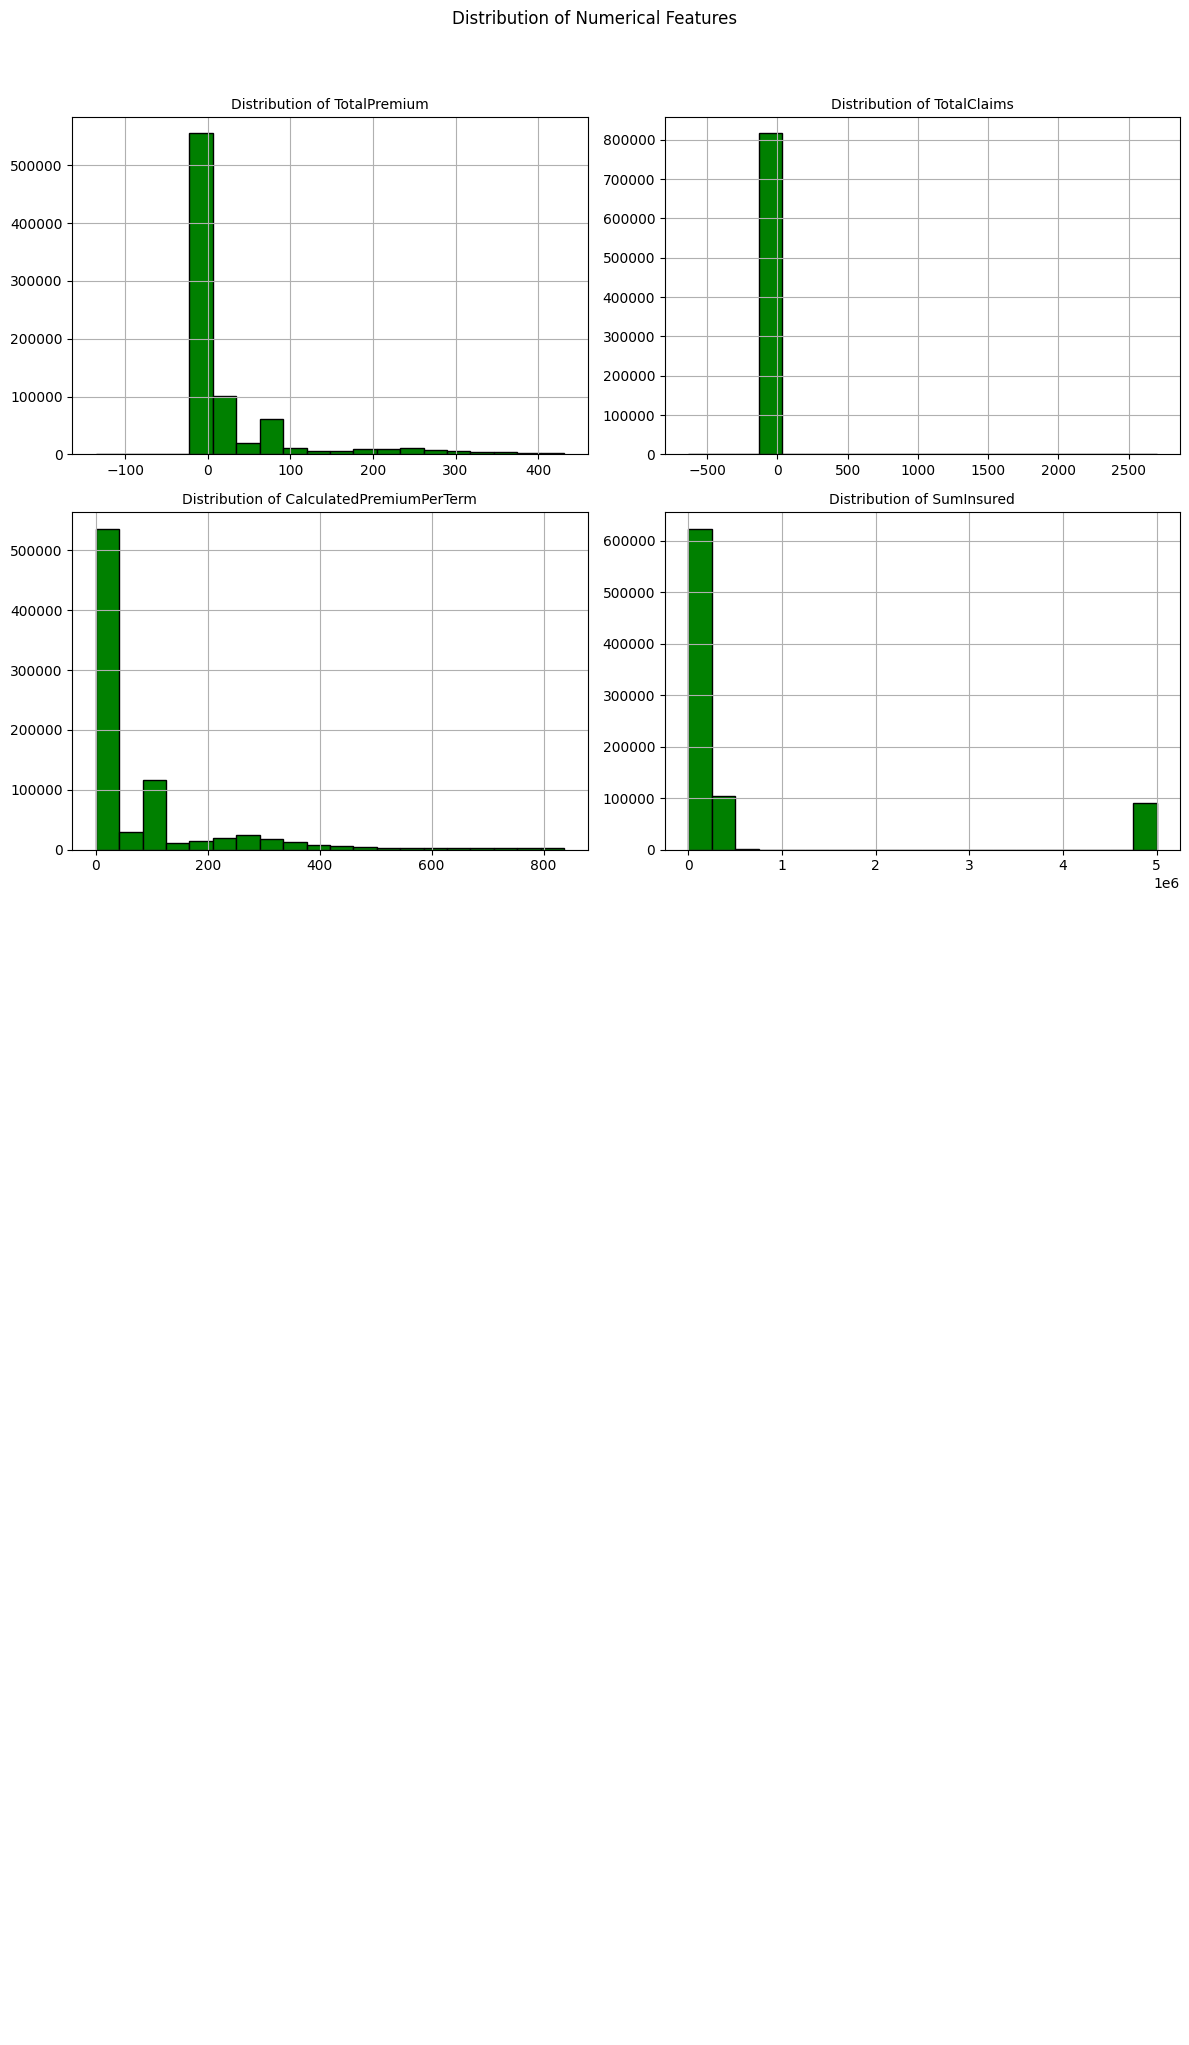

D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x=col, palette='Set2', ax=axes[i])
D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x=col, palette='Set2', ax=axes[i])
D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

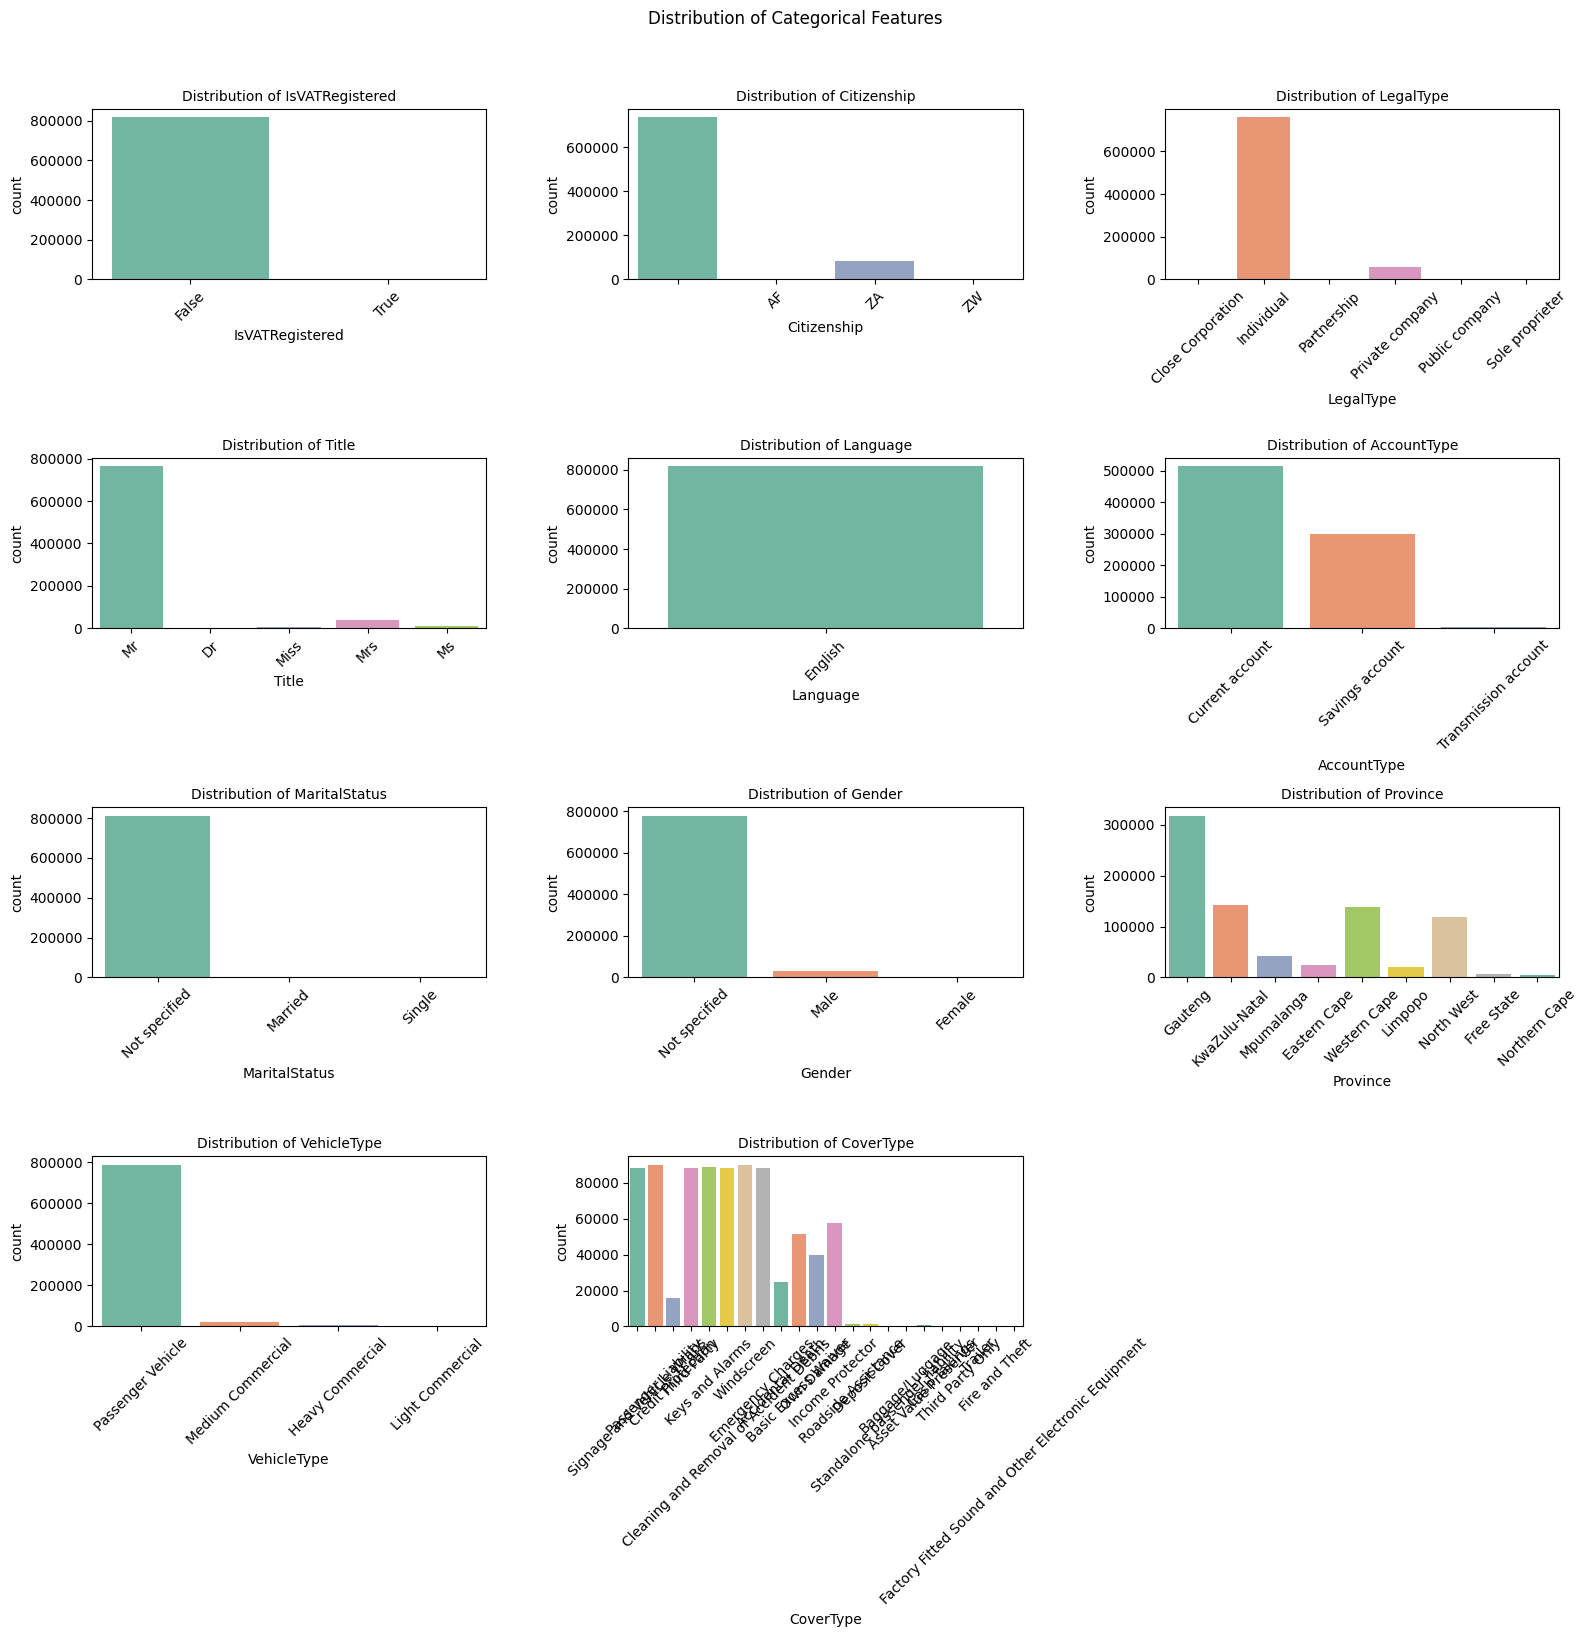

In [21]:

# Visualize the univariate distribution of the some columns
visualization.plot_univariate_analysis(['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured','IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 
                        'VehicleType', 'CoverType'])



### Bivariate or  Multivariate Analysis

In [35]:
eda_analysis= EDA(clean_df) 
# Calculate Loss Ratio (TotalClaims / TotalPremium)
clean_df['LossRatio'] = eda_analysis.calculate_loss_ratios()


What is the overall Loss Ratio for the portfolio?

In [23]:
overall_loss_ratio = eda_analysis.calculate_overall_loss_ratio()
print(f"\nOverall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")


Overall Portfolio Loss Ratio: 0.0306


How does Loss Ratio vary by Province,VehicleType, and Gender?


--- Loss Ratio by Province ---
        Province  TotalPremium    TotalClaims  LossRatio
5     Mpumalanga  1.404101e+06   79098.030526   0.056334
4        Limpopo  7.879944e+05   33724.043860   0.042797
6     North West  4.054034e+06  149564.000000   0.036893
2        Gauteng  9.978371e+06  329966.358772   0.033068
8   Western Cape  3.876524e+06   89485.921053   0.023084
0   Eastern Cape  7.676061e+05   17525.643860   0.022832
7  Northern Cape  1.571561e+05    3219.947368   0.020489
3  KwaZulu-Natal  4.815028e+06   94834.359649   0.019695
1     Free State  2.701651e+05    1282.228070   0.004746


D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=col, data=loss_ratio_by_col.sort_values('LossRatio', ascending=False), palette='coolwarm')


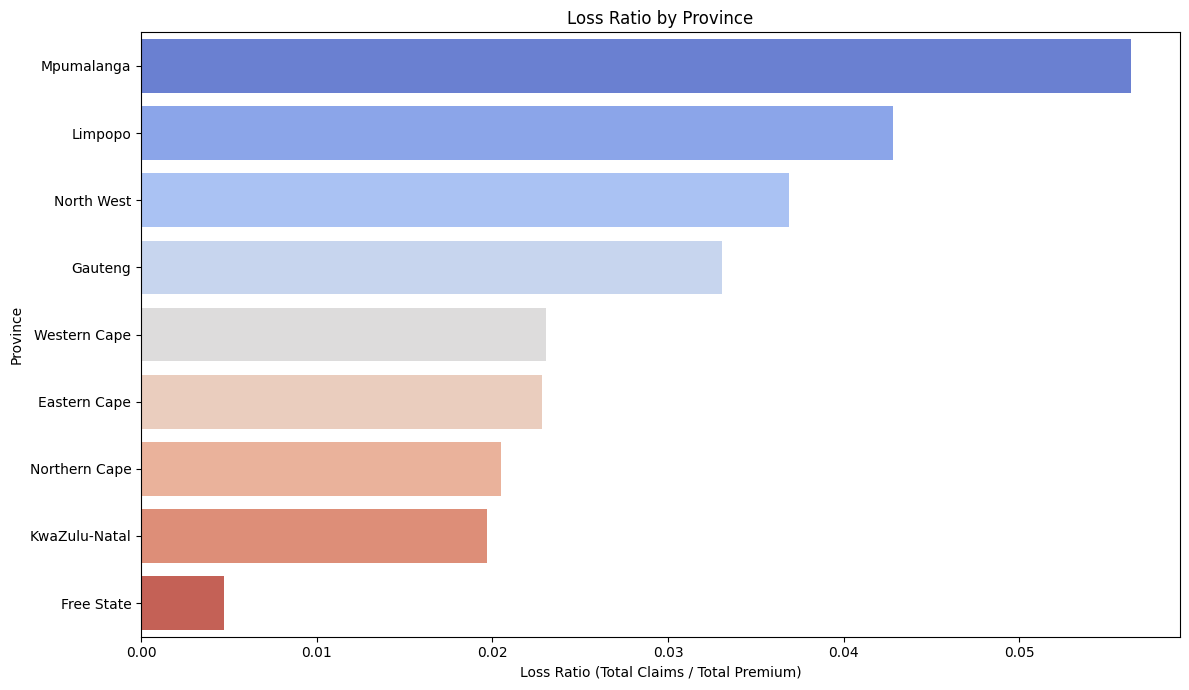


--- Loss Ratio by VehicleType ---
         VehicleType  TotalPremium    TotalClaims  LossRatio
0   Heavy Commercial  1.773860e+05   15186.815789   0.085615
2  Medium Commercial  6.841744e+05   46651.638596   0.068187
1   Light Commercial  8.629816e+04    4286.824561   0.049675
3  Passenger Vehicle  2.516312e+07  732575.254211   0.029113


D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=col, data=loss_ratio_by_col.sort_values('LossRatio', ascending=False), palette='coolwarm')


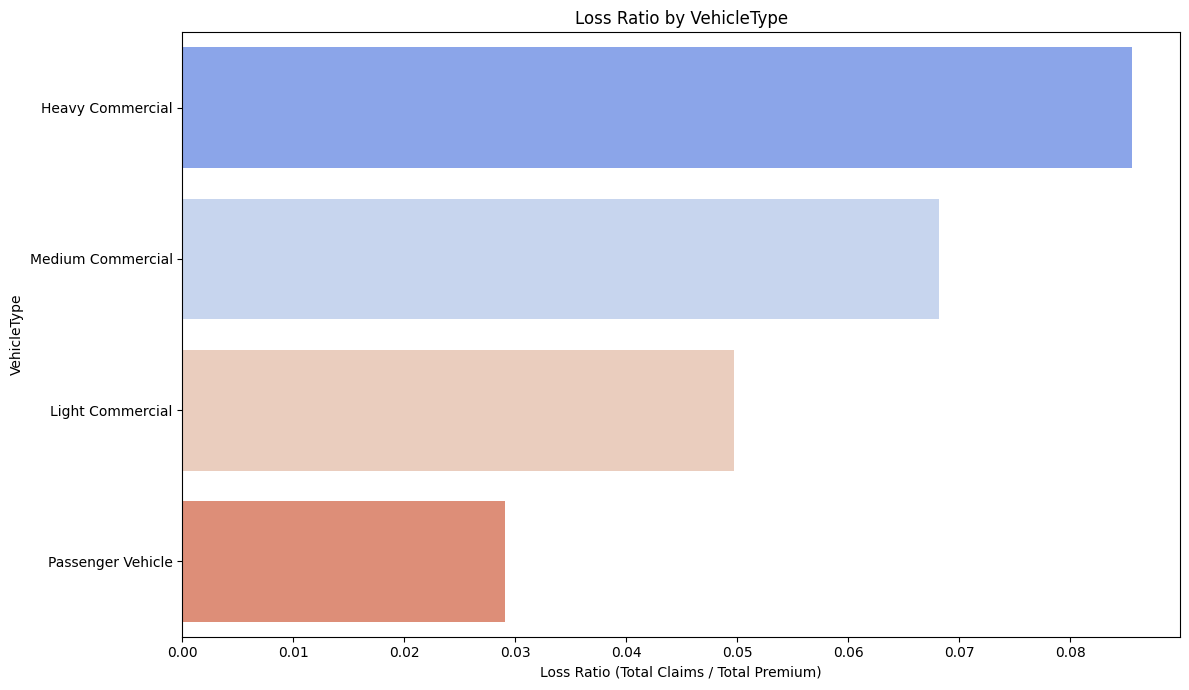


--- Loss Ratio by Gender ---
          Gender  TotalPremium    TotalClaims  LossRatio
1           Male  7.583993e+05   29780.289474   0.039267
0         Female  9.456635e+04    3128.307018   0.033081
2  Not specified  2.525801e+07  765791.936667   0.030319


D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=col, data=loss_ratio_by_col.sort_values('LossRatio', ascending=False), palette='coolwarm')


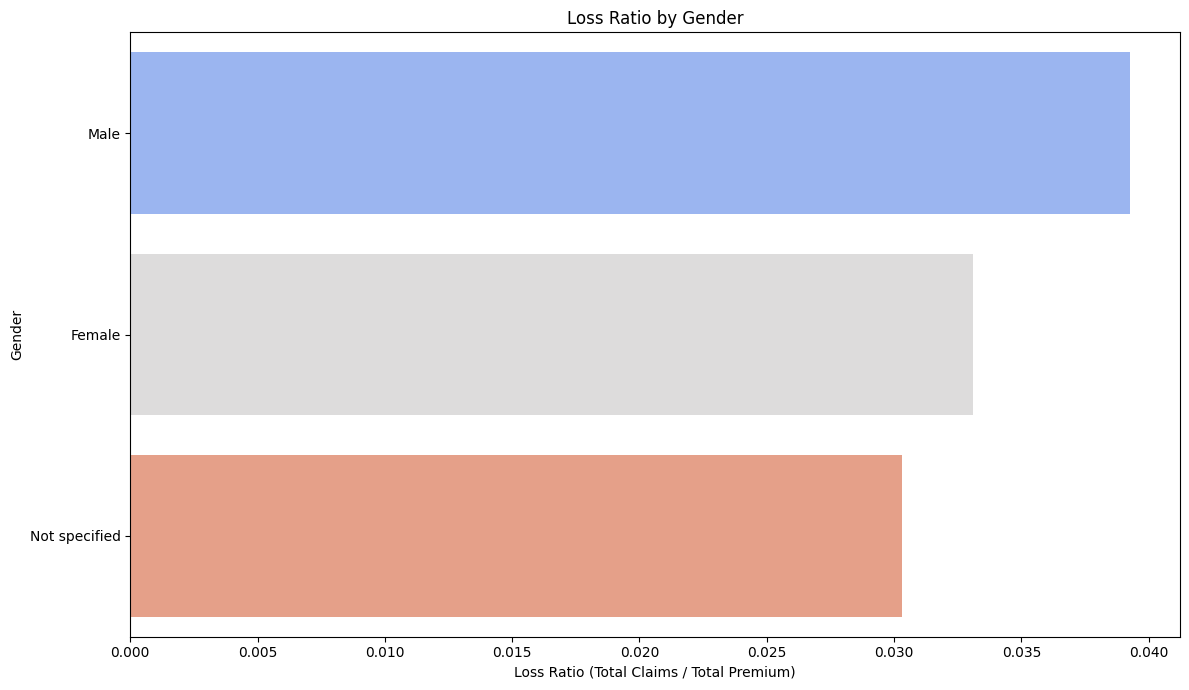

In [24]:
visualization.plot_loss_ratios('Province')
visualization.plot_loss_ratios('VehicleType')
visualization.plot_loss_ratios('Gender')


--- Correlation Matrix of Key Numerical Features ---
                          TotalPremium  TotalClaims  CalculatedPremiumPerTerm  \
TotalPremium                  1.000000    -0.001790                  0.502040   
TotalClaims                  -0.001790     1.000000                 -0.007847   
CalculatedPremiumPerTerm      0.502040    -0.007847                  1.000000   
SumInsured                   -0.084519    -0.010641                 -0.115775   
LossRatio                    -0.006667     0.552509                 -0.006626   

                          SumInsured  LossRatio  
TotalPremium               -0.084519  -0.006667  
TotalClaims                -0.010641   0.552509  
CalculatedPremiumPerTerm   -0.115775  -0.006626  
SumInsured                  1.000000  -0.007177  
LossRatio                  -0.007177   1.000000  


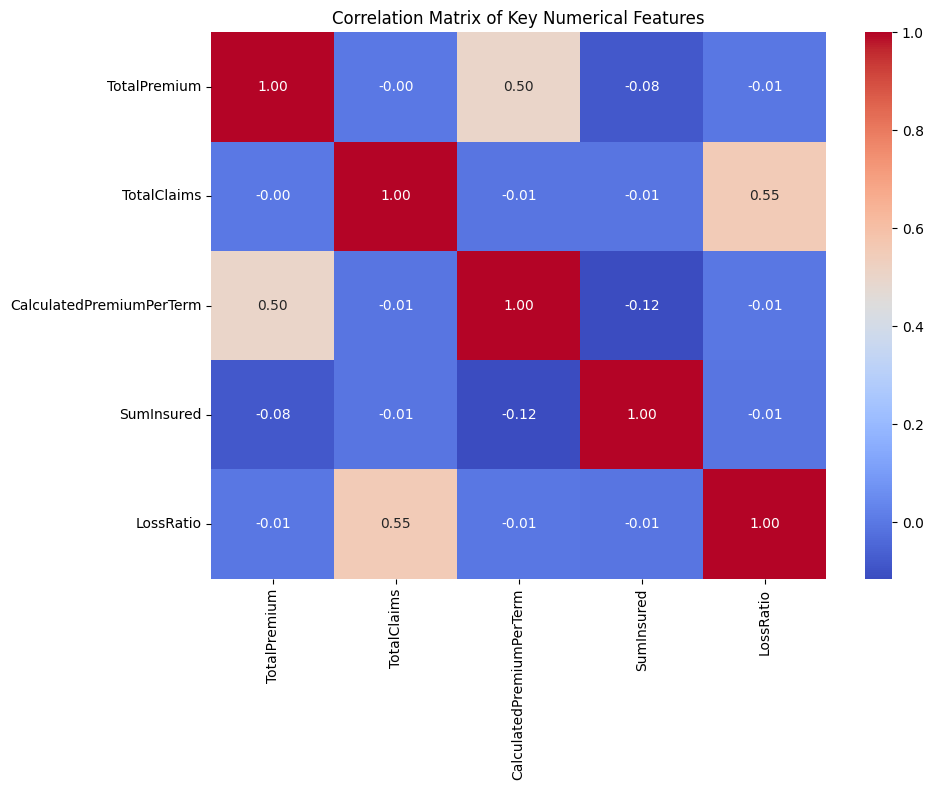

In [25]:

# Correlations between numerical features
print("\n--- Correlation Matrix of Key Numerical Features ---")
correlation_features = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured', 'LossRatio']
corr_matrix = clean_df[correlation_features].corr()
print(corr_matrix)
visualization.correlation_heatmap(corr_matrix)



Are there temporal trends? Did the claim frequency or severity change over the 18-month period?


--- Monthly Trends ---
   TransactionMonth  TotalPolicies  PoliciesWithClaims  TotalClaimsAmount  \
0           2013-10              4                   0           0.000000   
1           2013-11             60                   0           0.000000   
2           2013-12             76                   2        4755.315789   
3           2014-01             95                   1        2156.701754   
4           2014-02            109                   1        2700.000000   
5           2014-03            191                   0           0.000000   
6           2014-04            370                   1         850.000000   
7           2014-05            525                   4        7221.335965   
8           2014-06            644                   7       11144.642105   
9           2014-07            818                  11       12101.072632   
10          2014-08           1057                  17       18913.622807   
11          2014-09           1403                  

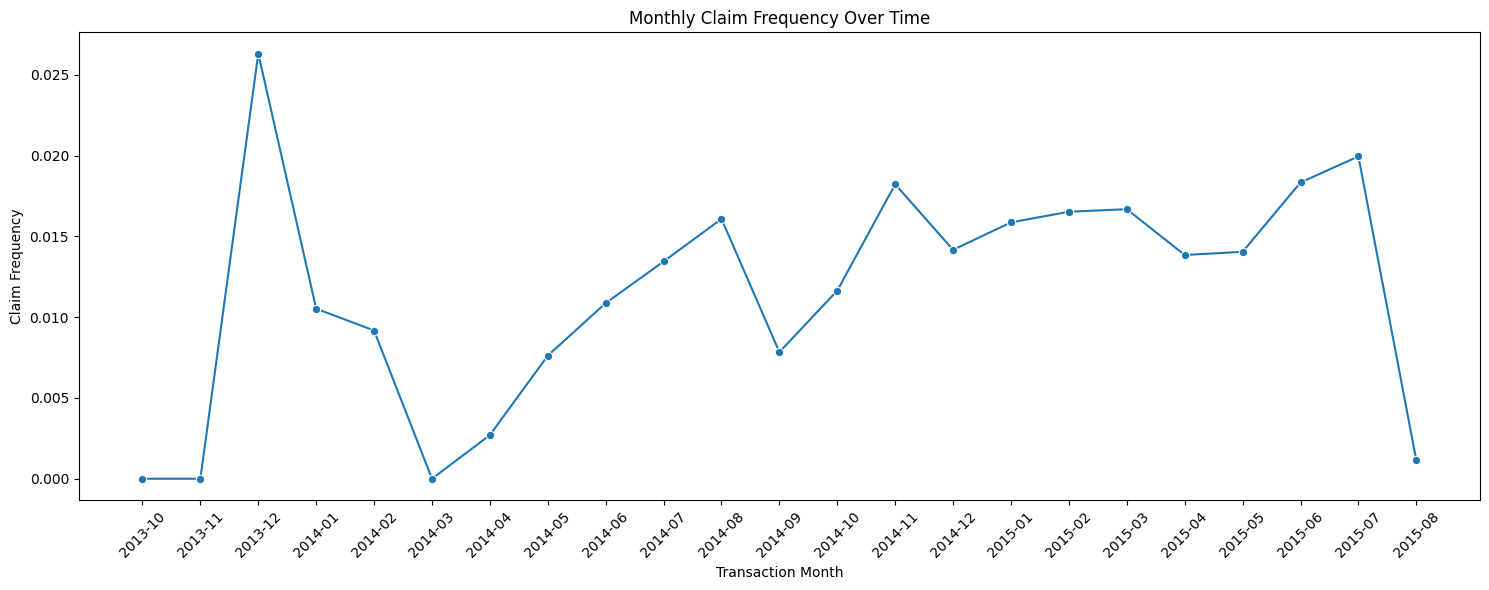

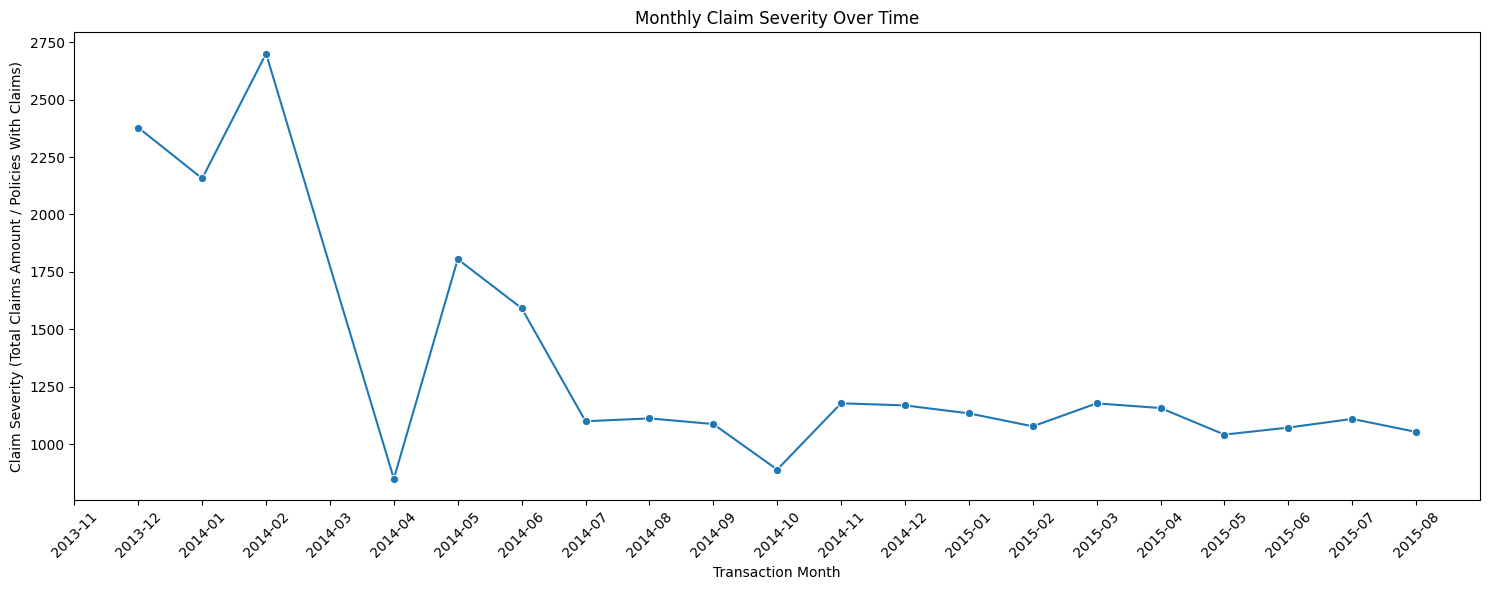

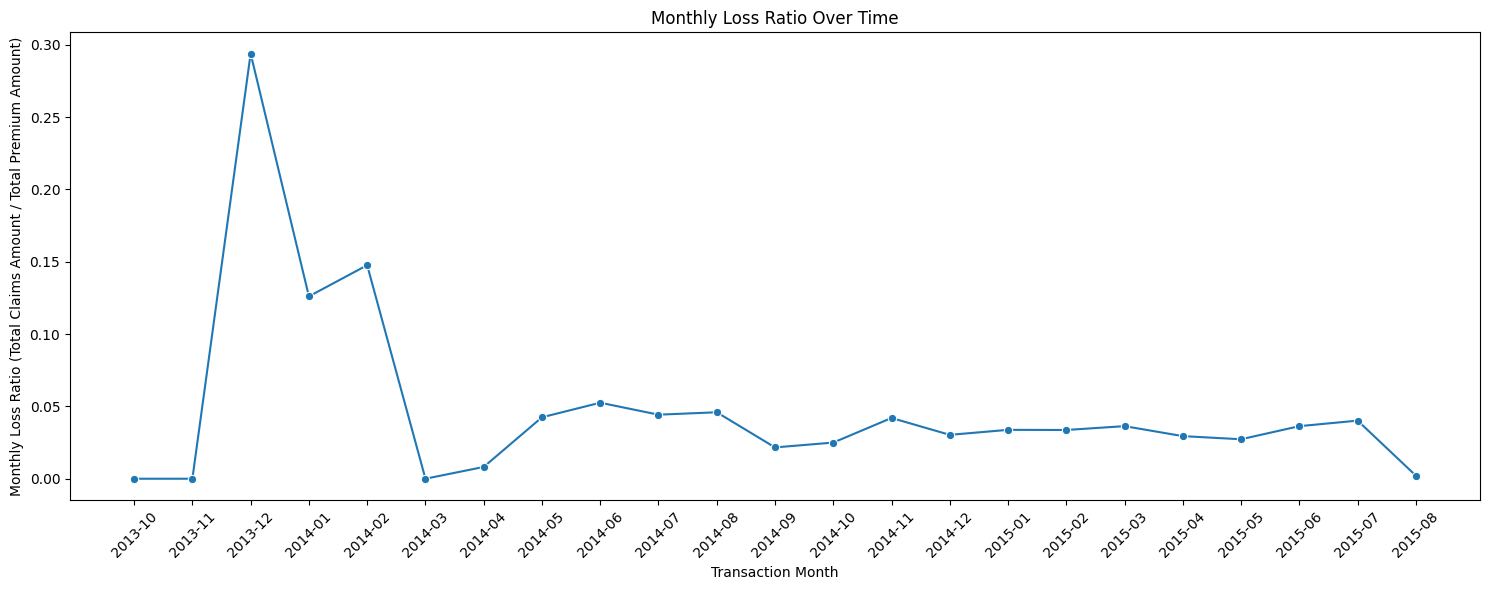

,TransactionMonth,TotalPolicies,PoliciesWithClaims,TotalClaimsAmount,TotalPremiumAmount,ClaimFrequency,ClaimSeverity,MonthlyLossRatio
0,2013-10,4,0,0.000000,2.191961e+02,0.000000,NaN,0.000000
1,2013-11,60,0,0.000000,1.224328e+04,0.000000,NaN,0.000000
2,2013-12,76,2,4755.315789,1.617570e+04,0.026316,2377.657895,0.293979
3,2014-01,95,1,2156.701754,1.710402e+04,0.010526,2156.701754,0.126093
4,2014-02,109,1,2700.000000,1.828536e+04,0.009174,2700.000000,0.147659
5,2014-03,191,0,0.000000,3.505194e+04,0.000000,NaN,0.000000
6,2014-04,370,1,850.000000,1.043039e+05,0.002703,850.000000,0.008149
7,2014-05,525,4,7221.335965,1.700045e+05,0.007619,1805.333991,0.042477
8,2014-06,644,7,11144.642105,2.120214e+05,0.010870,1592.091729,0.052564
9,2014-07,818,11,12101.072632,2.732165e+05,0.013447,1100.097512,0.044291


In [26]:
visualization.analyze_monthly_trends()


--- Top 10 Vehicle Models by Average Claim Amount (for policies with claims) ---
                                   Model  TotalClaims
0                    C180K BE AVANTGARDE  2700.000000
1                      AVANZA 1.5 SX A/T  2653.052632
2        CRAFTER 35 2.0 TDi 80KW F/C P/V  2631.578947
3  CRAFTER 50 2.0 BiTDi HR 120KW F/C P/V  2525.000000
4                  DUCATO MH2 C8 F/C P/V  2480.701754
5                         LANCER 1.6 GLX  2378.596491
6                   POLO 1.6 COMFORTLINE  1938.596491
7     CRAFTER 50 2.0 TDi HR 80KW F/C P/V  1920.175439
8               SPRINTER 309 CDI F/C P/V  1902.760234
9                       35S12V12 F/C P/V  1806.122807

--- Bottom 10 Vehicle Models by Average Claim Amount (for policies with claims) ---
                             Model  TotalClaims
21       QUANTUM 2.7 SESFIKILE 14s  1084.313753
22  QUANTUM 2.5 D-4D SESFIKILE 16s  1065.618360
23          C200 BE ESTATE CLASSIC  1052.631579
24                 MAKOYA 2.4i 16S  1048.245614

D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\analysis\visualization.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalClaims', y='Model', data=avg_claim_by_model, palette='Reds_d')


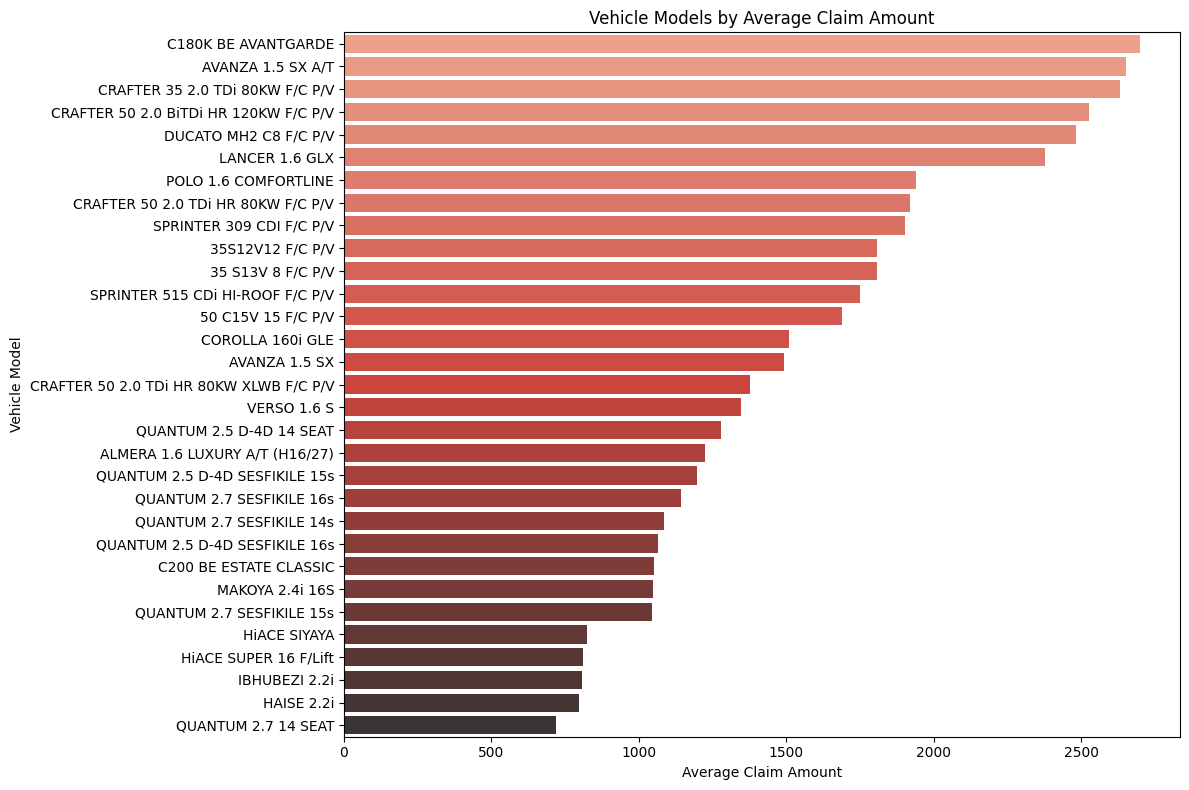

In [27]:
# vehicle model analysis
visualization.vehicle_model_analysis()

### Data - Compression - Trends Over Geography

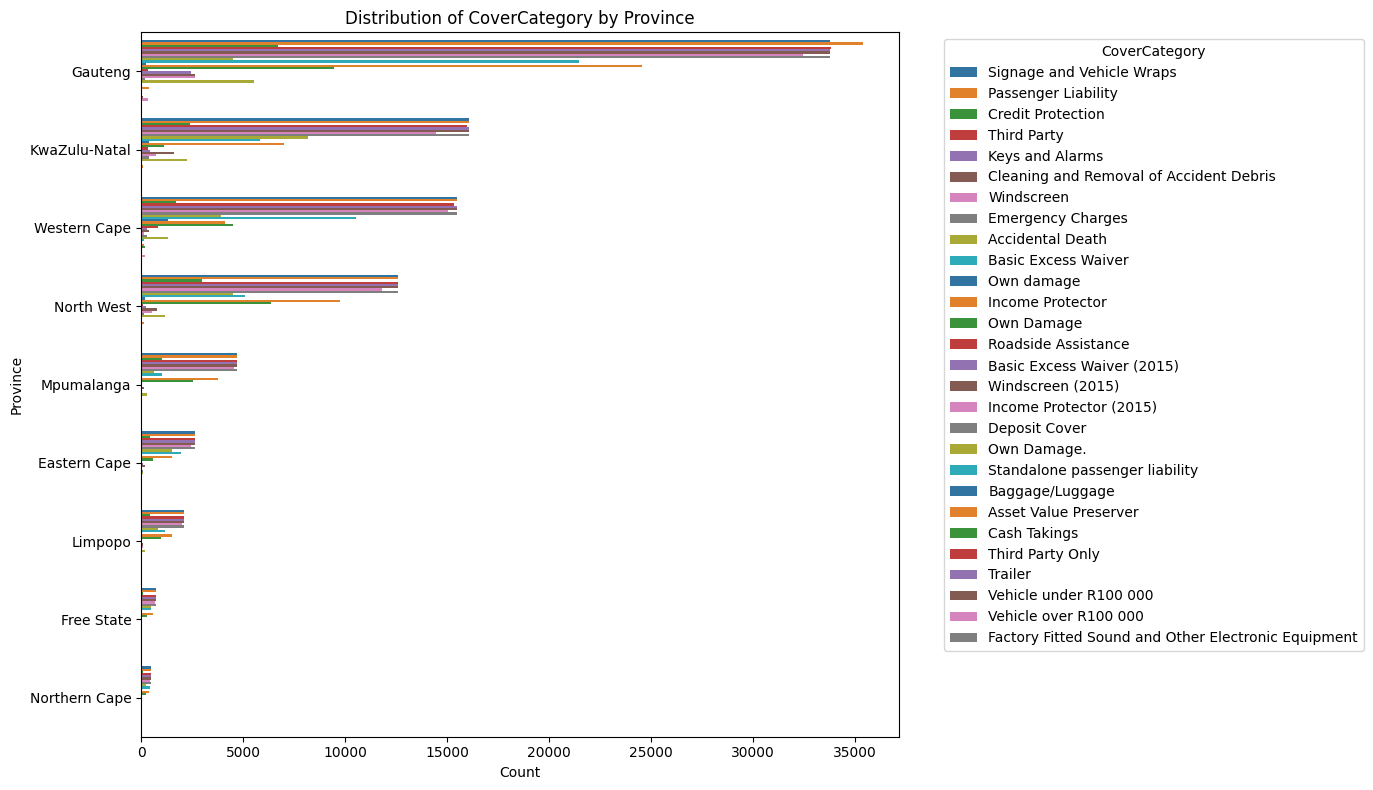

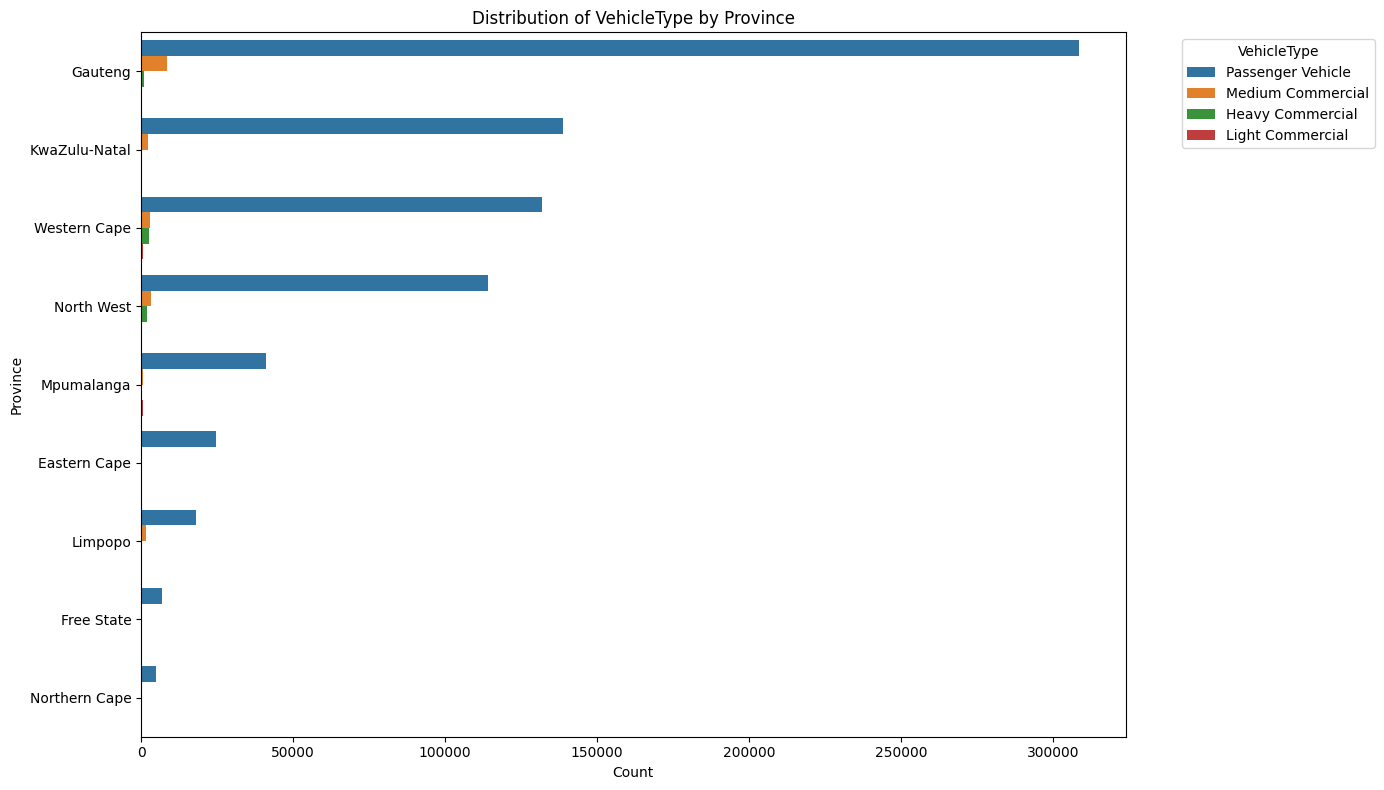

In [54]:
# a comparison of `CoverCategory` distribution by 'Province'
visualization.cover_category_distribution('Province','CoverCategory')
# a comparison of `VehicleType` distribution by 'Province'
visualization.cover_category_distribution('Province', 'VehicleType')